In [3]:
!pip install seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

     |████████████████████████████████| 294 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 1.3 MB/s eta 0:00:01


In [11]:
# 1. Data Loading & Familiarization

# Load data
df = pd.read_csv('/home/knoldus/Downloads/train.xls')
print(df.shape)
df.head()

# Understand the types of data in each column
df.info()
df.describe()



(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# 2. Initial Exploration

# Check missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
# 3. Data Cleaning

# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values) and Ticket, Name (irrelevant)
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

# Encode Sex and Embarked
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [15]:
# 4. Data Analysis

# Survival rate by gender
print(df.groupby('Sex')['Survived'].mean())

# Survival rate by class
print(df.groupby('Pclass')['Survived'].mean())

# Survival rate by age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,10,20,40,60,80], labels=['0-10','11-20','21-40','41-60','61-80'])
print(df.groupby('AgeGroup')['Survived'].mean())


Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
AgeGroup
0-10     0.593750
11-20    0.382609
21-40    0.364769
41-60    0.390625
61-80    0.227273
Name: Survived, dtype: float64


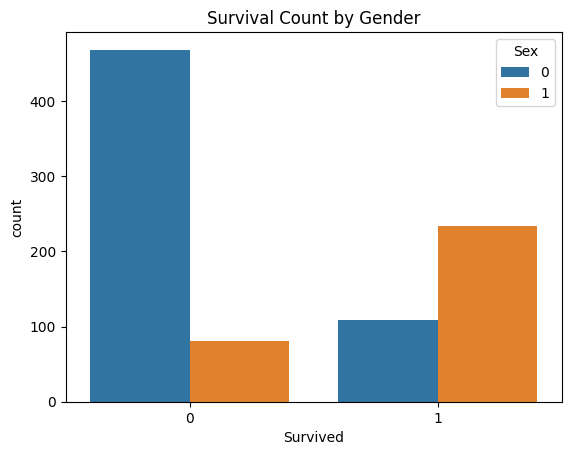

In [17]:
# 5. Visualization

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

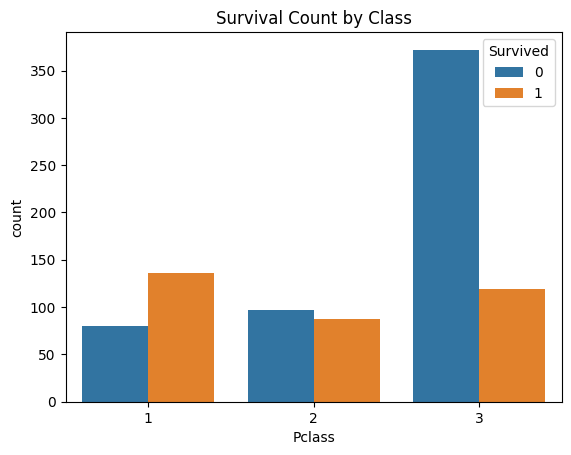

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Class')
plt.show()

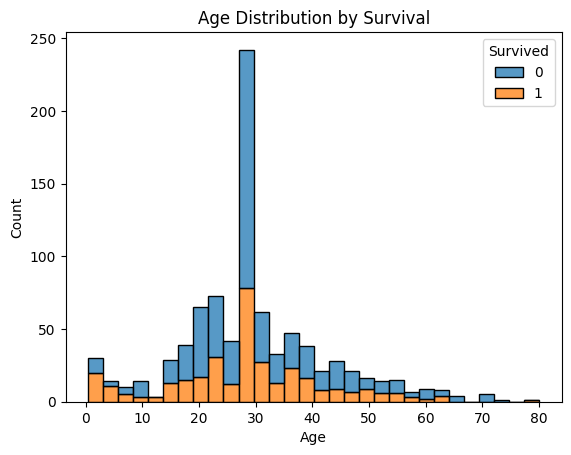

In [19]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

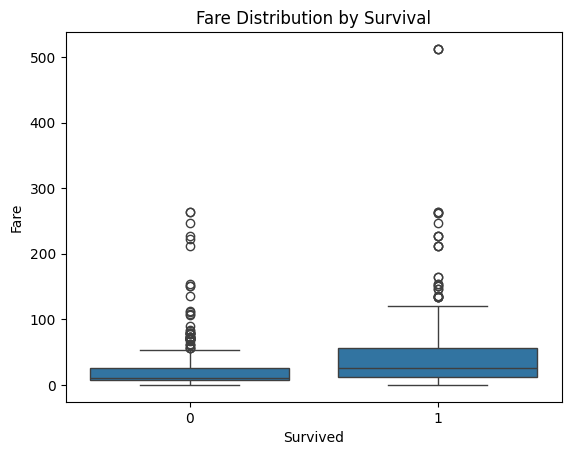

In [20]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()